In [2]:
import numpy as np
import h5py
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.metrics  import accuracy_score
from sklearn.metrics import log_loss

# TO DO
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !

In [11]:
def load_data():
    train_dataset = h5py.File('D:/deeepLeaningYoutub/datasets/trainset.hdf5', "r")
    
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('D:\\deeepLeaningYoutub\\datasets\\testset.hdf5', "r")
    
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    
    return X_train, y_train, X_test, y_test



In [45]:

X_train, y_train, X_test, y_test =  load_data()

#normalisation 


#print(f"demension de X: {X_train.shape}")
#print(f"demension de Y: {y_train.shape}")
#print( np.unique (y_train, return_counts=True))

#plt.scatter(X[:,0],X[:,1], c=Y,cmap="summer")
#plt.show()


array([[[164, 174, 163, ..., 144, 131, 134],
        [162, 174, 182, ..., 143, 144, 128],
        [158, 169, 187, ..., 158, 143, 151],
        ...,
        [175, 168, 166, ...,  91, 176, 173],
        [167, 166, 166, ...,  45, 184, 124],
        [176, 172, 168, ...,  87, 180,  39]],

       [[ 42,  43,  39, ...,  47,  46,  42],
        [ 38,  44,  42, ...,  40,  47,  42],
        [ 45,  46,  36, ...,  43,  40,  38],
        ...,
        [ 87,  85,  70, ...,  75,  78,  82],
        [ 70,  70,  71, ...,  52,  67,  68],
        [ 64,  61,  60, ...,  55,  52,  55]],

       [[ 27,  26,  29, ...,  84,  82,  84],
        [ 29,  27,  28, ...,  89,  88,  89],
        [ 28,  32,  27, ...,  88,  90,  86],
        ...,
        [101,  92,  17, ..., 112, 119, 123],
        [173, 178, 175, ..., 141, 137, 138],
        [ 10,  11,  26, ..., 135, 141, 121]],

       ...,

       [[ 47,  68, 142, ...,  39,  35,  33],
        [ 55,  68, 159, ...,  54,  41,  44],
        [ 58,  75, 141, ...,  40,  58,  63

In [29]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1) /X_train.max()
X_train_reshape.max()

1.0

In [30]:
X_test_reshape = X_test.reshape(X_test.shape[0],-1) / X_train.max()
X_test_reshape.max()

1.0

In [17]:
def initialisation(X_train):
    W=np.random.randn(X_train.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

In [33]:
W,b=initialisation(X_train)
W,b

(array([[ 0.94189487],
        [ 0.25802781],
        [ 0.86709408],
        ...,
        [ 0.88174516],
        [-0.39392583],
        [-1.34975606]]),
 array([-0.26859638]))

In [18]:


def model(X_train,W,b):
    Z=X_train.dot(W)+b
    A=1 / (1+np.exp(-Z))
    return A

In [73]:
A= model(X_train,W,b)
A.shape

C:\Users\Bakir\AppData\Local\Temp\ipykernel_6544\1058757959.py:3: RuntimeWarning: overflow encountered in exp
  A=1 / (1+np.exp(-Z))


(1000, 1)

In [41]:
#def log_loss(A,y_train):
    #return 1 / len(y_train) * np.sum(-y_train * np.log(A) - (1-y_train) *np.log(1-A))
    

In [19]:
loss = log_loss(y_train, A)
loss

NameError: name 'A' is not defined

In [20]:
def gradients(X_train , A ,y_train ):
    dW=1 / len(y_train) * np.dot(X_train .T,A - y_train)
    db= 1 /len(y_train) * np.sum(A-y_train)
    return (dW,db)

In [48]:
dW , db = gradients(X_train , A , y_train)
dW , db

(array([[0.21605463],
        [0.22051328],
        [0.22352593],
        ...,
        [0.23430593],
        [0.23634898],
        [0.23521565]]),
 0.49975287332127166)

In [21]:
def update(dW , db, W,b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

In [50]:
W,b =update(dW , db, W,b, 0.1)
W,b

(array([[ 0.9202894 ],
        [ 0.23597648],
        [ 0.84474148],
        ...,
        [ 0.85831457],
        [-0.41756073],
        [-1.37327762]]),
 array([-0.31857167]))

In [22]:
def predict(X_train,W,b):
    A=model(X_train,W,b)
    #print(A)
    return A>=0.5

In [37]:
from tqdm import tqdm

In [38]:
def artificial_neuron(X_train,y_train,learning_rate=0.4,n_iter=200):
    W,b = initialisation(X_train)
    loss=[]
    acc=[]
    for i in tqdm(range(n_iter)):
        A=model(X_train,W,b)

        if i % 10 ==0 :
            loss.append(log_loss(y_train,A))#loss= log_loss(A,Y)
        
            y_pred = predict(X_train,W,b)
            acc.append(accuracy_score(y_train,y_pred))
        
        dW,db = gradients(X_train , A , y_train)
        W,b = update(dW , db, W,b, learning_rate)
        
    # y_pred = predict(X_train,W,b)
    # print(accuracy_score(  y_pred, y_train
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss)
    plt.subplot(1, 2, 2)
    plt.plot(acc)
    plt.show()
    return (W,b)


    




        



In [42]:

def artificial_neuron_2(X_train,y_train,X_test,y_test,learning_rate=0.4,n_iter=200):
    W,b = initialisation(X_train)
    train_loss=[]
    train_acc=[]
    test_loss=[]
    test_acc=[]
    for i in tqdm(range(n_iter)):
        A=model(X_train,W,b)
        A_test=model(X_test,W,b)

        if i % 10 ==0 :
            #train
            train_loss.append(log_loss(y_train,A))#loss= log_loss(A,Y)
            y_train_pred = predict(X_train,W,b)
            train_acc.append(accuracy_score(y_train,y_train_pred))

            #test
            test_loss.append(log_loss(y_test,A_test))
            y_test_pred = predict(X_test,W,b)
            test_acc.append(accuracy_score(y_test,y_test_pred))
        
        dW,db = gradients(X_train , A , y_train)
        W,b = update(dW , db, W,b, learning_rate)
        
    # y_pred = predict(X_train,W,b)
    # print(accuracy_score(  y_pred, y_train
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss,label="train loss")
    plt.plot(test_loss,label="test loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train acc")
    plt.plot(test_acc, label="test acc")
    plt.legend()
    plt.show()
    return (W,b)
  

0.516


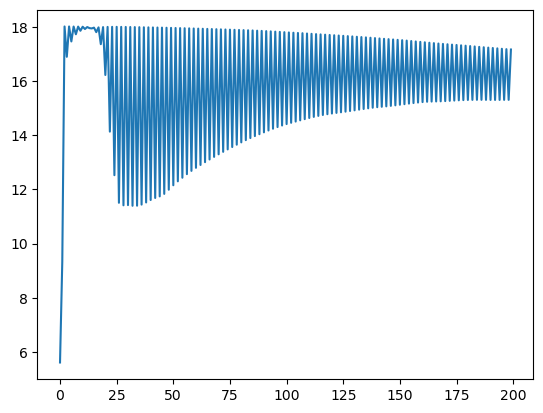

In [79]:
 W,b=artificial_neuron(X_train,y_train)
#W,b

In [49]:
new_plante = np.array([0,5])

[False]


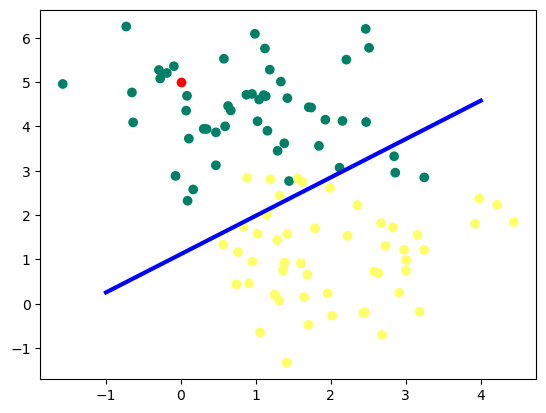

In [57]:
x0= np.linspace(-1,4,100)
print(predict(new_plante,W,b))
x1= (-W[0]* x0 - b ) /W[1]     
plt.scatter(new_plante[0],new_plante[1], c="r")
plt.scatter(X[:,0],X[:,1], c=Y,cmap="summer")
plt.plot(x0,x1, c="b" ,lw=3)
plt.show()

100%|██████████| 10000/10000 [01:33<00:00, 107.34it/s]


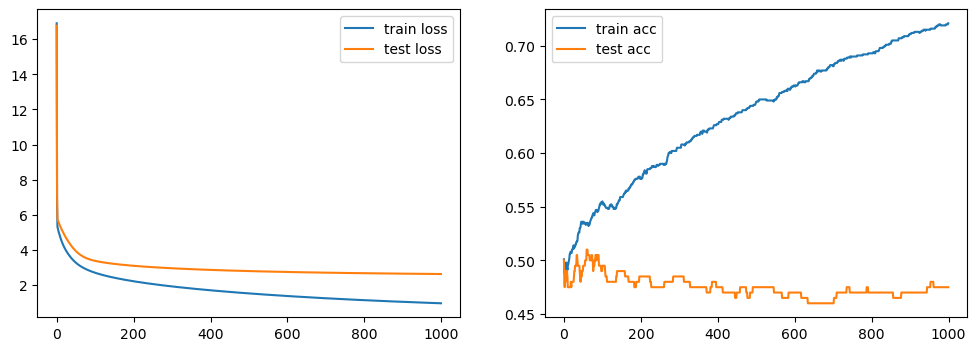

In [44]:
W,b=artificial_neuron_2(X_train_reshape,y_train,X_test_reshape,y_test,learning_rate=0.01,n_iter=10000)
